<a href="https://colab.research.google.com/github/driisss/Intro-To-AI/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(0.5579007415858528,
 0.3310344827586207,
 0.22929936305732485,
 '              precision    recall  f1-score   support\n\n           0       0.63      0.74      0.68      1125\n           1       0.33      0.23      0.27       628\n\n    accuracy                           0.56      1753\n   macro avg       0.48      0.49      0.48      1753\nweighted avg       0.52      0.56      0.54      1753\n',
 '/mnt/data/confusion_matrix.png')

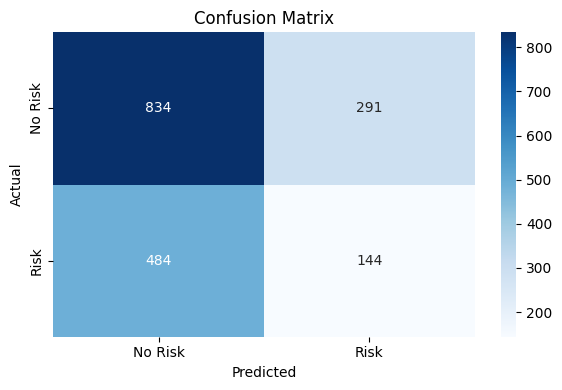

In [6]:
# Re-import necessary libraries after code execution state reset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reload the dataset
file_path = "/content/heart_attack_prediction_dataset.csv"
df = pd.read_csv(file_path)

# Drop irrelevant columns
df_clean = df.drop(columns=["Patient ID", "Country", "Continent", "Hemisphere"])

# Encode categorical columns
categorical_cols = df_clean.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

# Features and target
X = df_clean.drop("Heart Attack Risk", axis=1)
y = df_clean["Heart Attack Risk"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Plot and save confusion matrix
output_path = "/mnt/data"
os.makedirs(output_path, exist_ok=True)
image_path = os.path.join(output_path, "confusion_matrix.png")

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Risk", "Risk"], yticklabels=["No Risk", "Risk"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig(image_path)

accuracy, precision, recall, report, image_path


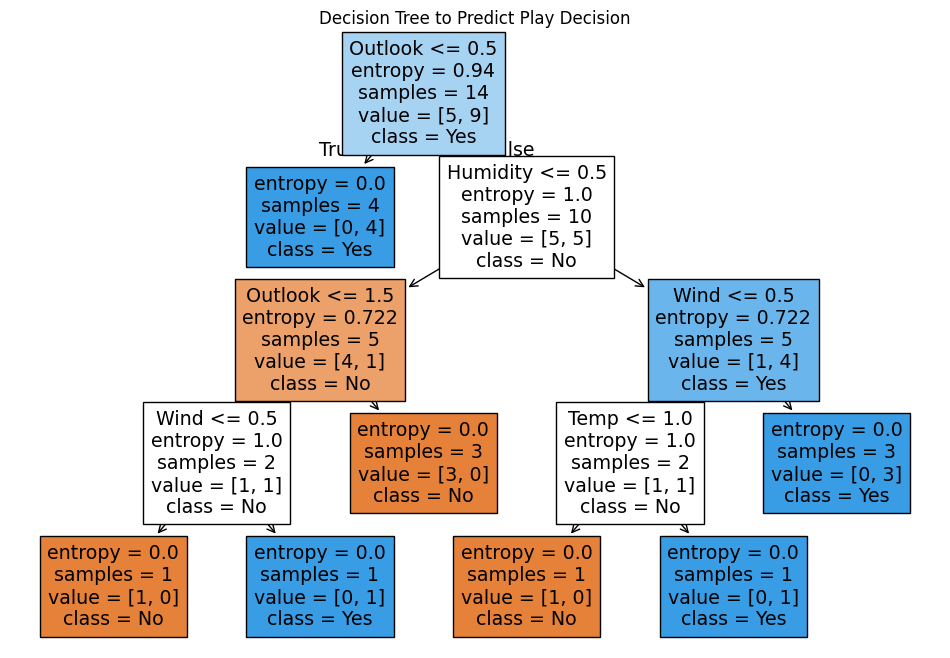

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

# Dataset based on the image
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast',
                'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
             'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
                 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong',
             'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Decision': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
                 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Load into a DataFrame
df = pd.DataFrame(data)

# Encode categorical features
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

# Split features and target
X = df.drop('Decision', axis=1)
y = df['Decision']

# Train the decision tree classifier
model = DecisionTreeClassifier(criterion='entropy', random_state=0)
model.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree to Predict Play Decision")
plt.show()


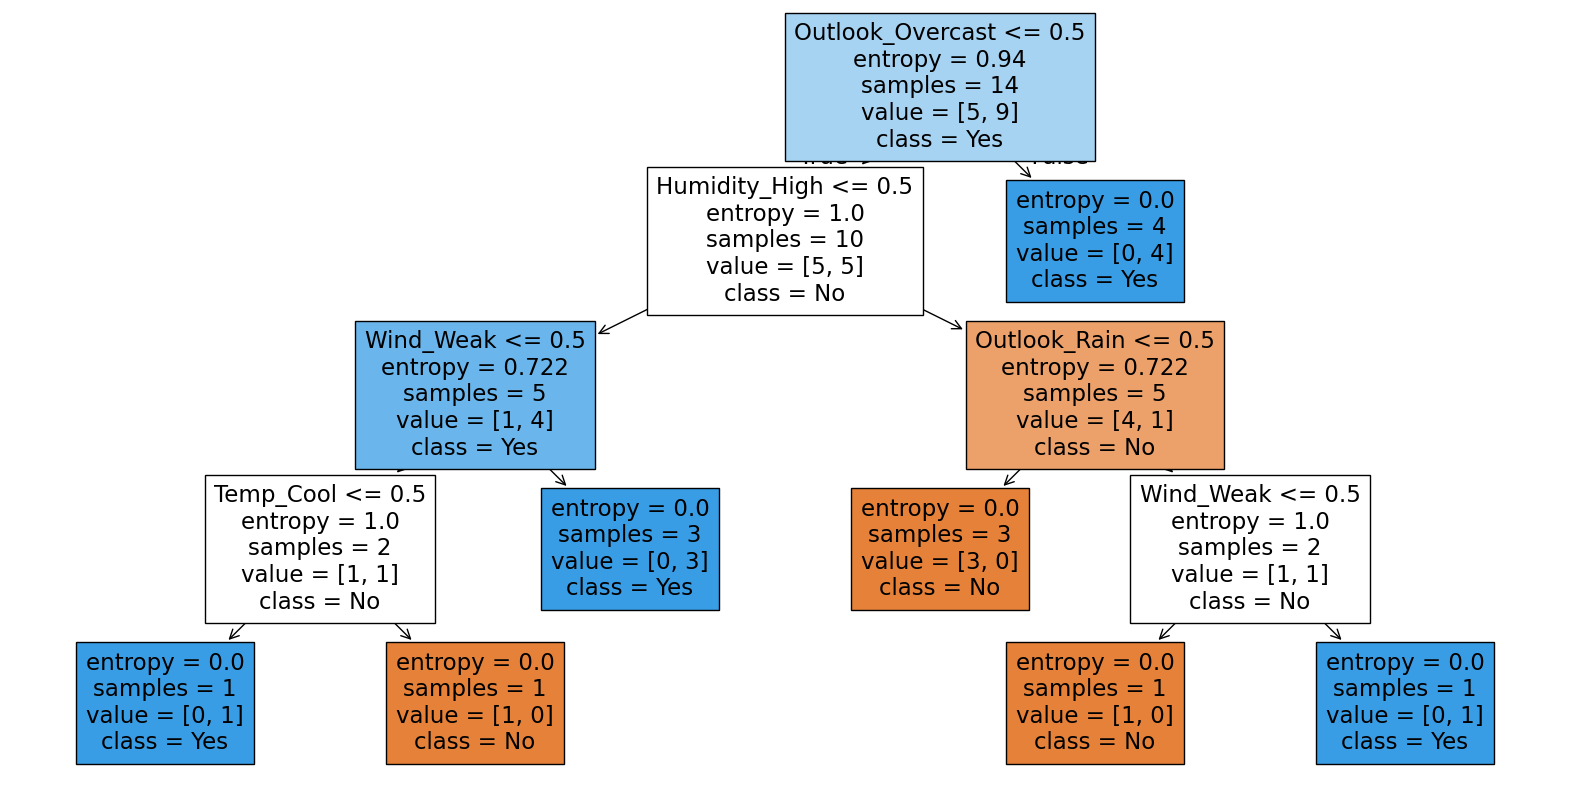

In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Create the dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Decision': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Step 2: Encode categorical variables
df_encoded = pd.get_dummies(df.drop('Decision', axis=1))
y = df['Decision'].map({'Yes': 1, 'No': 0})  # Convert to binary

# Step 3: Train decision tree
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(df_encoded, y)

# Step 4: Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=df_encoded.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


Max depth: 1, Validation Accuracy: 0.7887
Max depth: 2, Validation Accuracy: 0.7746
Max depth: 3, Validation Accuracy: 0.7958
Max depth: 4, Validation Accuracy: 0.7958
Max depth: 5, Validation Accuracy: 0.8099
Max depth: 6, Validation Accuracy: 0.7958
Max depth: 7, Validation Accuracy: 0.7958
Max depth: 8, Validation Accuracy: 0.7746
Max depth: 9, Validation Accuracy: 0.7606
Max depth: 10, Validation Accuracy: 0.7606

Best max_depth based on validation: 5

Test Set Performance:
Accuracy:  0.7762
Precision: 0.7407
Recall:    0.6897
F1-score:  0.7143


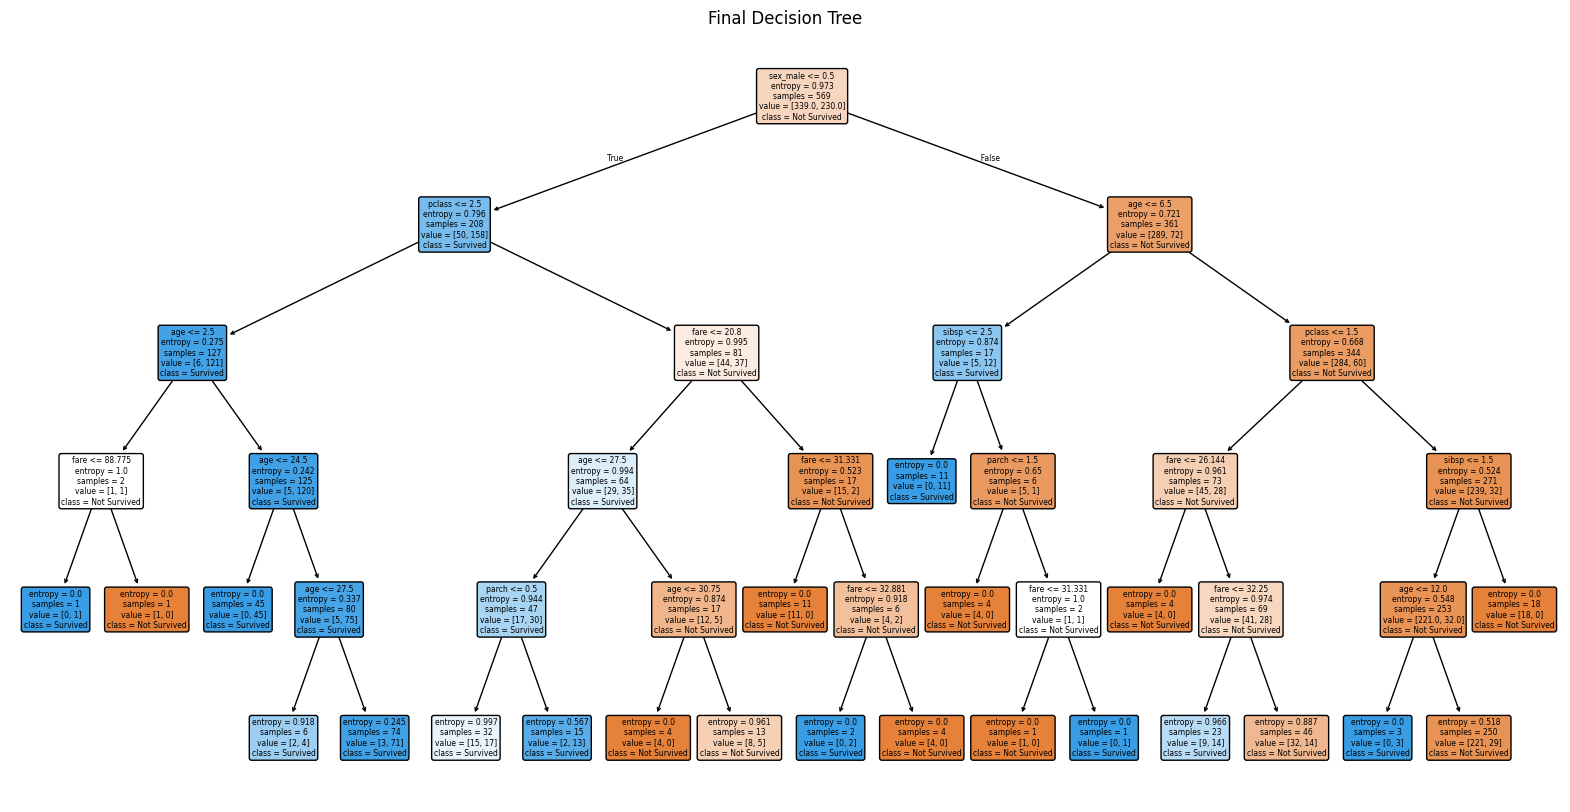

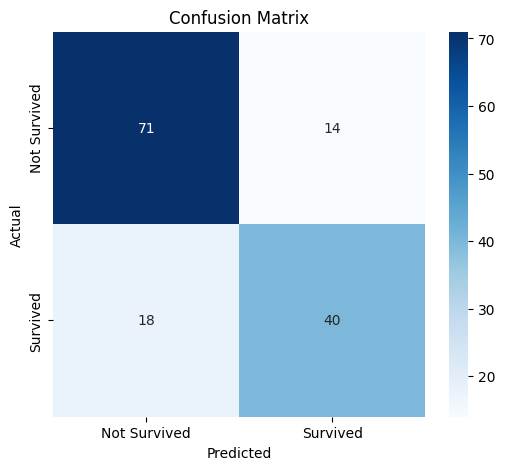

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
df = pd.read_csv('/content/titanic.csv')

# Select relevant features and drop missing values
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'
df_model = df[features + [target]].dropna()

# One-hot encode categorical variables
df_model = pd.get_dummies(df_model, columns=['sex', 'embarked'], drop_first=True)

# Split into features and target
X = df_model.drop(target, axis=1)
y = df_model[target]

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.6, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=0.5, random_state=42, stratify=y_temp)

# Hyperparameter tuning
best_depth = None
best_val_acc = 0
for depth in range(1, 11):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    val_preds = clf.predict(X_val)
    val_acc = accuracy_score(y_val, val_preds)
    print(f"Max depth: {depth}, Validation Accuracy: {val_acc:.4f}")
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_depth = depth

print(f"\nBest max_depth based on validation: {best_depth}")

# Retrain final model on combined train + validation data
X_final_train = pd.concat([X_train, X_val])
y_final_train = pd.concat([y_train, y_val])
final_clf = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth, random_state=42)
final_clf.fit(X_final_train, y_final_train)

# Evaluate on test set
y_test_pred = final_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("\nTest Set Performance:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

# Plot decision tree
plt.figure(figsize=(20,10))
plot_tree(final_clf, feature_names=X_final_train.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.title("Final Decision Tree")
plt.show()

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
